In [51]:
#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.metrics import confusion_matrix
from sklearn. preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

import os

import cv2
from PIL import Image
from skimage import io
import scipy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

from keras.utils import np_utils


In [73]:
oopencv_haar_path = "/home/hantz_angrand72/master620/opencv/data/haarcascades/haarcascade_frontalface_default.xml"





def create_data_set(x_crop= 150, y_crop=150, train_size=.8): 

    """ Load the Yale Faces data set, extract the faces on the images and generate labels for each image.

        

        Returns: Train and validation samples with their labels. The training samples are flattened arrays 

        of size 22500 (150 * 150) , the labels are one-hot-encoded values for each category

    """

    images_path = [ os.path.join("yalefaces", item)  for item in  os.listdir("yalefaces") ]

    image_data = []

    image_labels = []

    

    for i,im_path in enumerate(images_path):

        im = io.imread(im_path,0)

#        if( i== 10) or (i==40) or (i==50):

#            io.imshow(im)

#            io.show()

        image_data.append(np.array(im, dtype='uint8'))

        

        

        

        label = int(os.path.split(im_path)[1].split(".")[0].replace("subject", ""))  -1

       

            

        image_labels.append(label)

    faceDetectClassifier = cv2.CascadeClassifier(opencv_haar_path)

    

    cropped_faces = []

    for im in image_data:

        facePoints = faceDetectClassifier.detectMultiScale(im)

        x,y = facePoints[0][:2]

        cropped = im[y: y + y_crop, x: x + x_crop]

        cropped_faces.append(cropped/255)

        

    X_ = np.array(cropped_faces).astype('float32')

    enc = LabelEncoder()

    y_ = enc.fit_transform(np.array(image_labels))

    #y_ = np_utils.to_categorical(y_)

   
    X_train, X_test, y_train, y_test = train_test_split(X_, y_, train_size=train_size, random_state = 22)
    #return X_train, X_test, y_train, y_test
    return (X_train).reshape((X_train.shape[0],X_train.shape[1]*X_train.shape[2])), (X_test).reshape((X_test.shape[0],X_test.shape[1]*X_test.shape[2])), y_train, y_test

In [74]:
X_train, X_test, y_train, y_test = create_data_set()

In [75]:
np.shape(X_train),np.shape(y_train)

((132, 22500), (132,))

In [69]:
type(X_train)

numpy.ndarray

In [70]:
classes = np.unique(y_train)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)

Total number of outputs :  15
Output classes :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14]


In [71]:
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [76]:
#df1 = pd.DataFrame(dummy_data1, columns = ['id', 'Feature1', 'Feature2'])
df = pd.DataFrame(X_train)

In [77]:
df.columns[classes]

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14], dtype='int64')

In [78]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [94]:
estimators=[]

#Defining 5 Linear Discrimant Analysis
model1 = LinearDiscriminantAnalysis()
estimators.append(("lda1", model1))
model2 = LinearDiscriminantAnalysis()
estimators.append(("lda2", model2))
model3 = LinearDiscriminantAnalysis()
estimators.append(("lda3", model3))
model4 = LinearDiscriminantAnalysis()
estimators.append(("lda4", model4))
model5 = LinearDiscriminantAnalysis()
estimators.append(("lda5", model5))

#Defining 5 CNN
model6=MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(15,), random_state=1)
estimators.append(("cnn6",model6))
model7=MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(15,), random_state=1)
estimators.append(("cnn7",model7))
model8=MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(15,), random_state=1)
estimators.append(("cnn8",model8))
model9=MLPClassifier(solver='lbfgs', alpha=1e-5,
                     hidden_layer_sizes=(15,), random_state=1)
estimators.append(("cnn9",model9))
model10=MLPClassifier(solver='lbfgs', alpha=1e-5,
                      hidden_layer_sizes=(15,), random_state=1)


estimators.append(("cnn10",model10))


ensemble = VotingClassifier(estimators)
ensemble.fit(X_train, y_train)
y_pred = ensemble.predict(X_test)





In [95]:
#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)


In [96]:
ensemble.score(X_test,y_test)

0.8823529411764706

In [81]:
#Confisuin matrix
cm_HybridEnsembler = confusion_matrix(y_test, y_pred)

In [97]:
cm_HybridEnsembler

array([[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 2, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

In [83]:
#Cross-Validation
#seed = 7
kfold = model_selection.KFold(n_splits=10)
results = model_selection.cross_val_score(ensemble, X_train, y_train, cv=kfold)
print(results.mean())

/home/hantz_angrand72/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.8346153846153846


Found 30 correct labels


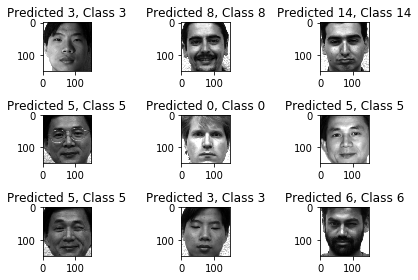

In [103]:
correct = np.where(y_pred==y_test)[0]
print ("Found %d correct labels" % len(correct))
for i, correct in enumerate(correct[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[correct].reshape(150,150), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[correct], y_test[correct]))
    plt.tight_layout()


Found 4 incorrect labels


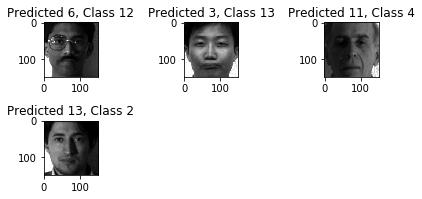

In [104]:
incorrect = np.where(y_pred!=y_test)[0]
print ("Found %d incorrect labels" % len(incorrect))
for i, incorrect in enumerate(incorrect[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[incorrect].reshape(150,150), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(y_pred[incorrect], y_test[incorrect]))
    plt.tight_layout()

In [107]:
from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(15)]
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

     Class 0       1.00      1.00      1.00         4
     Class 1       1.00      1.00      1.00         1
     Class 2       1.00      0.50      0.67         2
     Class 3       0.80      1.00      0.89         4
     Class 4       1.00      0.67      0.80         3
     Class 5       1.00      1.00      1.00         3
     Class 6       0.67      1.00      0.80         2
     Class 7       1.00      1.00      1.00         3
     Class 8       1.00      1.00      1.00         3
     Class 9       1.00      1.00      1.00         1
    Class 10       1.00      1.00      1.00         1
    Class 11       0.67      1.00      0.80         2
    Class 12       1.00      0.67      0.80         3
    Class 13       0.00      0.00      0.00         1
    Class 14       1.00      1.00      1.00         1

    accuracy                           0.88        34
   macro avg       0.88      0.86      0.85        34
weighted avg       0.91   

https://www.analyticsvidhya.com/blog/2018/06/comprehensive-guide-for-ensemble-models/